<a href="https://colab.research.google.com/github/Maucho6340/1764-estadistica-con-python-probabilidad-y-muestreo/blob/main/Regresi%C3%B3n_Lineal_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regresión Lineal II</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conociendo el Dataset</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca pandas

https://pandas.pydata.org/

In [22]:
import pandas as pd

## El Dataset y el Proyecto
<hr>

### Descripción:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>El mercado inmobiliario ha sido objeto de varios estudios e investigaciones en los últimos tiempos. La crisis financiera que afecta a la economía ha afectado significativamente las inversiones y ganancias de este sector. Este escenario fomenta un mayor interés en los estudios de previsión de la demanda basados ​​en las características de este mercado, los inmuebles y el entorno de estos inmuebles.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>En este contexto, el principal objetivo de nuestro proyecto es desarrollar un sistema de valuación inmobiliaria utilizando la metodología de regresión lineal, que es una de las técnicas de Machine Learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nuestro *dataset* es una muestra aleatoria de 5000 inmuebles disponibles para la venta en el municipio de Rio de Janeiro.</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (US$) de oferta del inmueble</li>
    <li><b>Área</b> - Área del inmueble en m²</li>
    <li><b>Dist_Playa</b> - Distancia del inmueble a la playa (km) (en línea recta)</li>
    <li><b>Dist_Farmacia</b> - Distancia del inmueble a la farmacia más cercana (km) (en línea recta)</li>
</ul>

## Lectura de los datos

In [23]:
datos=pd.read_csv('dataset.csv',sep=';')

## Ver los datos

In [24]:
datos

,Valor,Area,Dist_Playa,Dist_Farmacia
0,850277,280,0.240925428,0.793637
1,166359,208,0.904135764,0.134494
2,471349,170,0.05952528,0.423318
3,101664,100,288.318.073,0.525064
4,406654,164,0.239757554,0.192374
...,...,...,...,...
4995,135860,70,0.479357396,0.752891
4996,166359,128,8.594.487.125,0.370170
4997,147874,70,0.253138238,0.421407
4998,35120,55,8.945.226.049,0.680963


## Verificando el tamaño del dataset

In [25]:
datos.shape

(5000, 4)

# <font color='red' style='font-size: 30px;'>1.3 Analisis preliminar</font>
<hr style='border: 2px solid red;'>

## Estadísticos descriptivos


In [26]:
datos.describe().round(2)

,Valor,Area,Dist_Farmacia
count,5000.00,5000.00,5000.00
mean,259320.95,121.94,0.50
std,348108.85,90.54,0.29
min,13863.00,16.00,0.00
25%,85028.00,70.00,0.24
50%,151571.00,93.00,0.50
75%,293900.00,146.00,0.75
max,4621072.00,2000.00,1.00


## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> coeficiente de correlación </b> es una medida de asociación lineal entre dos variables y su valor está entre <b> -1 </b> y <b> +1 </b>, dónde <b> - 1 </b> indica asociación negativa perfecta y <b> +1 </b> indica asociación positiva perfecta.</p>

In [27]:
# Limpiar datos
datos.dtypes  # Revisa qué columnas están como 'object' (texto)

,0
Valor,int64
Area,int64
Dist_Playa,object
Dist_Farmacia,float64


In [28]:
# Asegúrate de aplicar esta limpieza y conversión a 'Dist_Playa'
# si aún no lo has hecho o si tus datos se cargan de nuevo con ese formato.

# Paso 1: Reemplazar los puntos de miles por una cadena vacía
# Esto convierte '288.318.073' en '288318073' antes de la conversión
datos['Dist_Playa'] = datos['Dist_Playa'].astype(str).str.replace('.', '', regex=False)

# Paso 2: Convertir la columna a float
# Ahora sí se puede convertir a float correctamente
datos['Dist_Playa'] = datos['Dist_Playa'].astype(float)

# Si también tienes que hacer algo similar para 'Valor' o 'Area' y esperas floats:
# datos['Valor'] = datos['Valor'].astype(str).str.replace('.', '', regex=False).astype(float)
# datos['Area'] = datos['Area'].astype(str).str.replace('.', '', regex=False).astype(float)

datos.dtypes

,0
Valor,int64
Area,int64
Dist_Playa,float64
Dist_Farmacia,float64


In [29]:
datos['Dist_Playa'] = datos['Dist_Playa'].astype(float)

In [30]:
datos.corr().round(4)

,Valor,Area,Dist_Playa,Dist_Farmacia
Valor,1.0000,0.7110,-0.3354,-0.0244
Area,0.7110,1.0000,-0.2515,-0.0310
Dist_Playa,-0.3354,-0.2515,1.0000,0.0199
Dist_Farmacia,-0.0244,-0.0310,0.0199,1.0000


Necesitamos que la tres variables candidatas a explicativas, no tengan correlación fuerte entre sí, eso es muy malo a la hora de sumar al modelo.<br>

Área tiene una correlación moderada con distnacia a la playa, y muy baja con relación a distancia a la farmacia.<br>

Distancia a la playa, tiene una correlación muy baja con la distancia a la farmacia.<br>

Entonces podemos concluir que las tres candidatas a variables explicativas, no tienen correlación fuerte entre si, y por eso podemos utilizarlas en nuestro modelo de aproximación al principio.


# <font color='red' style='font-size: 30px;'>2.1 Comportamiento de la variable dependiente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos.</p>

In [31]:
import seaborn as sns

## Configuración del formato de los gráficos

In [32]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

# style -> white, dark, whitegrid, darkgrid, ticks


In [33]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

## Box plot de la variable *dependiente* (y)

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

ax es la variable que se asignará al objeto gráfico

<Axes: title={'center': 'Precio de los Inmuebles'}, xlabel='Dolares'>

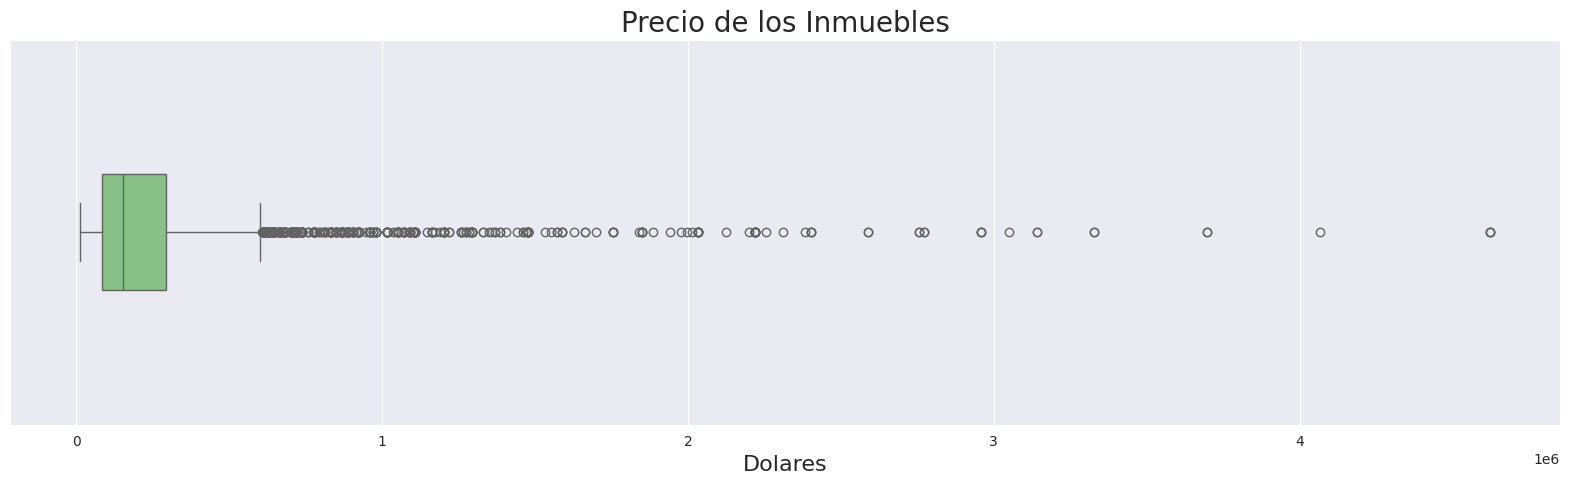

In [37]:
ax=sns.boxplot(data=datos['Valor'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Precio de los Inmuebles', fontsize=20)
ax.set_xlabel('Dolares', fontsize=16)
ax

Este tipo de variable, tienen típicamente este comportamiento de muchos punto por encima del límite superior y es debido a este peculiar comportamiento que debemos tener cuidado en clasificar todos estos puntos como outliners, pues sólo los tres últimos puntos son realmente outliers.<br>

Con esta pila de puntos por sobre el límite superior, podría indicar una simetría hacia la derecha de la variable precio de los inmuebles. Para entender mejor, es necesario revisar el histograma de la variable.

# <font color='red' style='font-size: 30px;'>2.2 Distribución de frecuencias</font>
<hr style='border: 2px solid red;'>

## Distribución de frecuencias de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

El código original del instructor es:<br>

**<font color=darkgreen> ax=sns.displot(datos['Valor'])<br>
ax.figure.set_size_inches(20, 5)<br>
ax.set_title('Precio de los Inmuebles', fontsize=20)<br>
ax.set_xlabel('Dolares', fontsize=16)<br>
ax<br>**

Pero no grafica bien pues contiene error y no entrega la línea de densidad (KDE)<br>

Por ello inserté este código sugerido por AI COPILOT


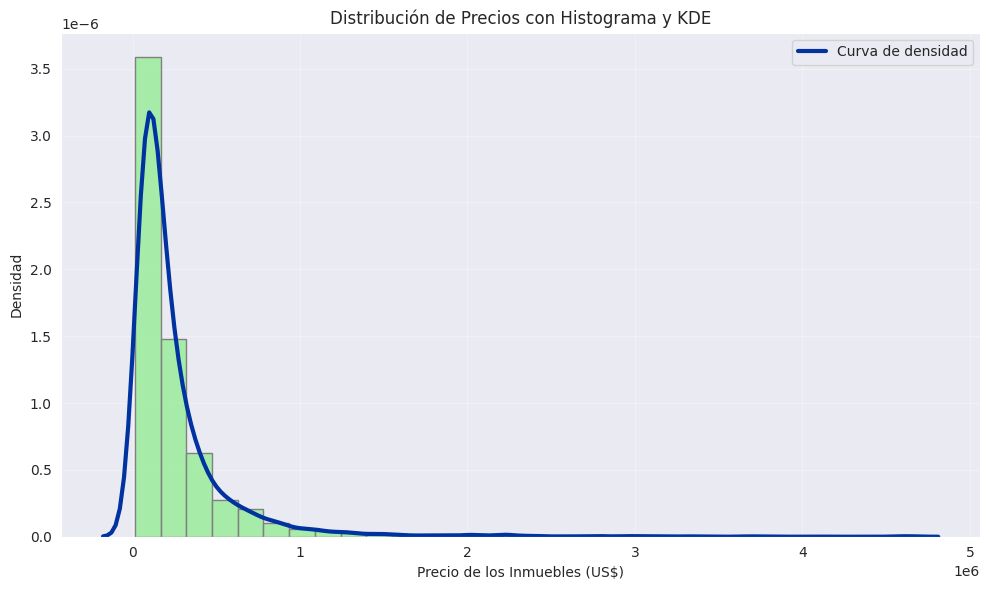

In [78]:
plt.figure(figsize=(10, 6))

# Histograma con densidad en lugar de conteo
sns.histplot(datos['Valor'],
             stat='density',
             kde=False,
             color='lightgreen',
             edgecolor='gray',
             bins=30)

# Curva KDE separada en azul intenso
sns.kdeplot(datos['Valor'],
            color='#0033A0',  # Azul profundo
            linewidth=3,
            label='Curva de densidad')

# Detalles visuales
plt.title('Distribución de Precios con Histograma y KDE')
plt.xlabel('Precio de los Inmuebles (US$)')
plt.ylabel('Densidad')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Analizando este histograma, podemos ver una concentración para valores mas bajos, o sea, una simetría a la derecha. Esto tiene sentido para este tipo de variable donde hay muchos inmuebles con precios bajos y pocos con precios altos (de lujo). Esto es muy común cuando manejamos datos reales. El tema es que esto puede generar problemas al generar el modelo de regresión, pues una de las los supuestos teóricos del modelo de regresión es que la variable depediente tenga una forma simétrica. <br>

Esta simetría dificilmente ocurrirá con datos relaes, pero debemos intentar que la variable se acerque los mas posible a esa forma.<br>

Del histograma deducimos que la forma se parece mas a la figura de asimetría a la derecha.<br>

Si bien esta variable con gran asimetría puede generar problemas, podemos hacer transformaciones de los datos para que sea menos asimétrica y se acerque mas a la figura del medio.


<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Box-Plot+II.png'>

# <font color='red' style='font-size: 30px;'>2.3 Dispersión entre las Variables</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables del dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre pares de variables en un dataset.</p>

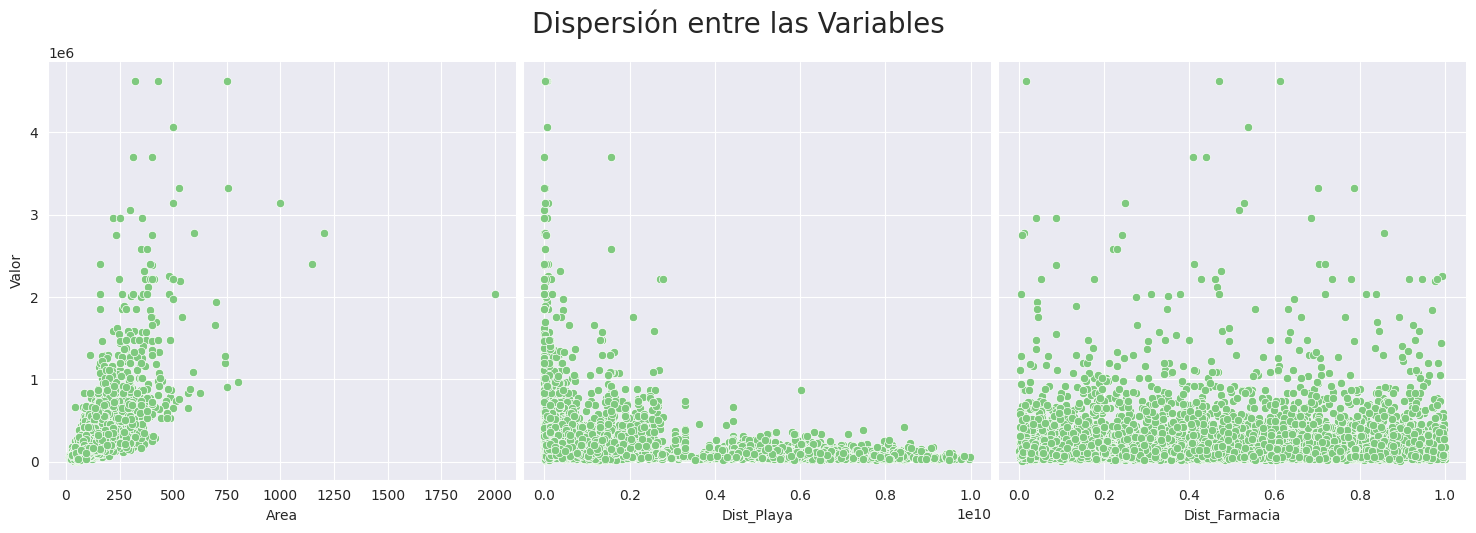

In [58]:
ax=sns.pairplot(datos, y_vars='Valor',x_vars=['Area',	'Dist_Playa',	'Dist_Farmacia'] , height=5.0)
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

Podemos ver que en el primer y segundo gráfico una cierta tendencia no líneal, es decir, a una curva. No así entre valor y distancia a la farmacia, donde no podemos identificar ninguna tendencia, cuyos puntos no muestran ninguna dirección.

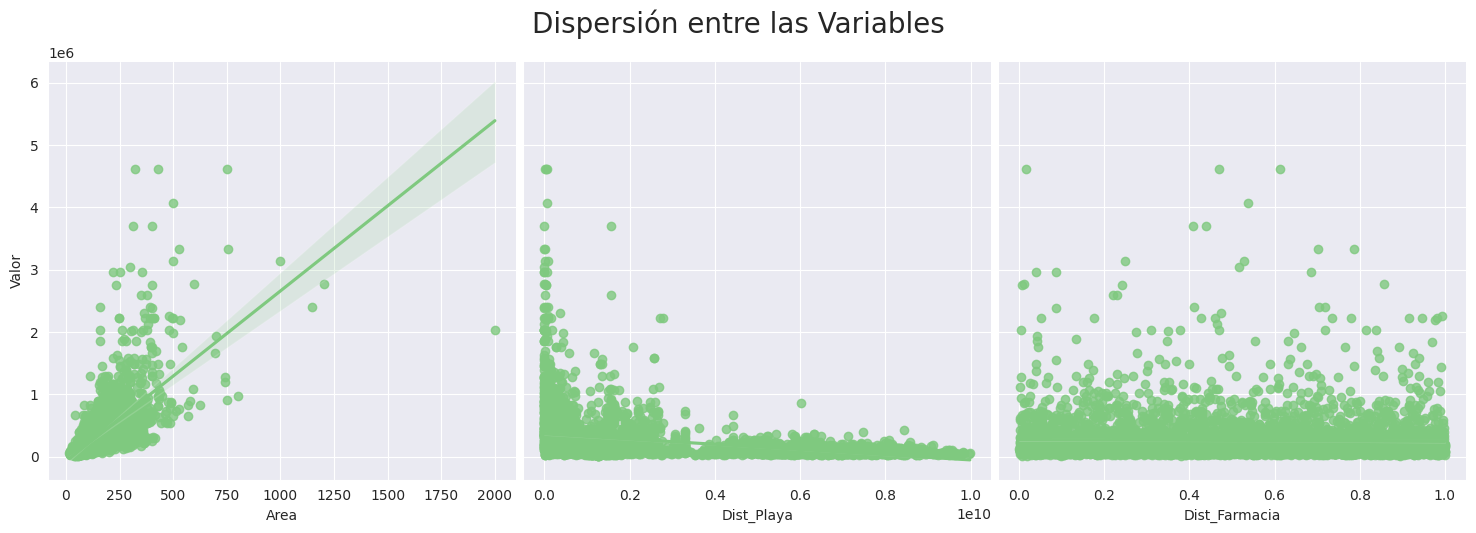

In [60]:
ax=sns.pairplot(datos, y_vars='Valor',x_vars=['Area',	'Dist_Playa',	'Dist_Farmacia'] , height=5.0, kind='reg')
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

Aquí podemos ver que los puntos no siguen la línea de regresión. Los puntos están muy dispersos en los tres gráficos, mayor en el tercero.<br>

Podemos concluir que la variable valor no está relacionada de forma lineal con las variables explicativas, por lo tanto no podemos estimar el modelo de regresión linear.<br>

Lo que vamos a hacer es aplicar una técnica de transformación, que será la técnica logarítmica. Una vez transformadas, vamos a intentar identificar la relación lineal entre las variable dependiente "valor" y las variables explicativas "Area", "Dist_playa" y "Dist_famacia".

# <font color='red' style='font-size: 30px;'>3.1 Transformando los Datos</font>
<hr style='border: 2px solid red;'>

## Distribuición Normal
<hr>

### ¿Porque?
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Tests paramétricos asumen que los datos muestrales se recopilaron de una población con una distribución de probabilidad conocida. Muchos de los tests estadísticos asumen que los datos siguen una distribución normal (t de Student, intervalos de confianza, etc.).</p>





<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando la biblioteca numpy

In [61]:
import numpy as np

## Aplicando la transformación logarítmica a los datos del *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [64]:
np.log(0)

/tmp/ipython-input-64-2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


np.float64(-inf)

Debemos tener en cuenta que Log(1)=0, pero Log(0)=indefinido, puesto que en DF tenemos valores 0 (valores mínimos). Entonces no podemos aplicar logaritmo en forma directa a estos datos, pues no va a dar resultados indefinidos, puesto que el modelo de regresión no admite valores indefinidos.<br>

Entonces vamos a cambiar sus escalas.

Primero aplicamos Log a la variable "valor" que no tiene valores en cero pues el mín de valor es $13.863.<br>

Lo mismo ocurre con la variable "Area"

In [72]:
datos['log_Valor']=np.log(datos['Valor']) # Podemos aplicar directamente log, porque esta variable no tiene valores en cero
datos['log_Area']=np.log(datos['Area']) # Podemos aplicar directamente log, porque esta variable no tiene valores en cero
datos['log_Dist_Playa']=np.log(datos['Dist_Playa']+1) # Cambiamos la escala, agregando 1 al valor de la variable
datos['log_Dist_Farmacia']=np.log(datos['Dist_Farmacia']+1) # Cambiamos la escala, agregando 1 al valor de la variable

In [71]:
datos.head()

,Valor,Area,Dist_Playa,Dist_Farmacia,log_Valor,log_Area,log_Dist_Playa,log_Dist_Farmacia
0,850277,280,240925428.0,0.793637,13.653317,5.634790,19.299998,0.584245
1,166359,208,904135764.0,0.134494,12.021903,5.337538,20.622490,0.126187
2,471349,170,5952528.0,0.423318,13.063354,5.135798,15.599327,0.352991
3,101664,100,288318073.0,0.525064,11.529429,4.605170,19.479575,0.422036
4,406654,164,239757554.0,0.192374,12.915718,5.099866,19.295139,0.175946


Ahora tenemos que ver si la transformación a logaritmo logró reducir la simetría en la variable valor. Vamos a contruir el histograma para la variable valor.

## Distribuición de frecuencias de la variable *dependiente transformada* (y)

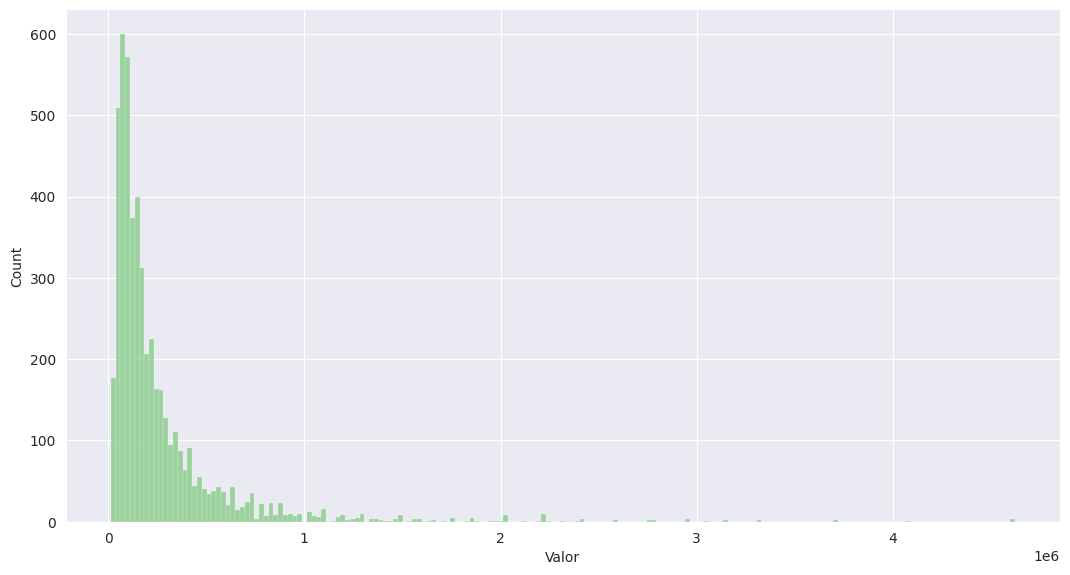

In [76]:
ax=sns.displot(datos['Valor'])
ax.figure.set_size_inches(12, 6)
#ax.set_title('Distribuición de Frecuencias', fontsize=20)
#ax.set_xlabel('log del Precio de los Inmuebles', fontsize=16)
ax

Lambda óptimo para Box-Cox: -0.1752
Asimetría antes: 4.912312066155681
Asimetría después: 0.01565080181947175


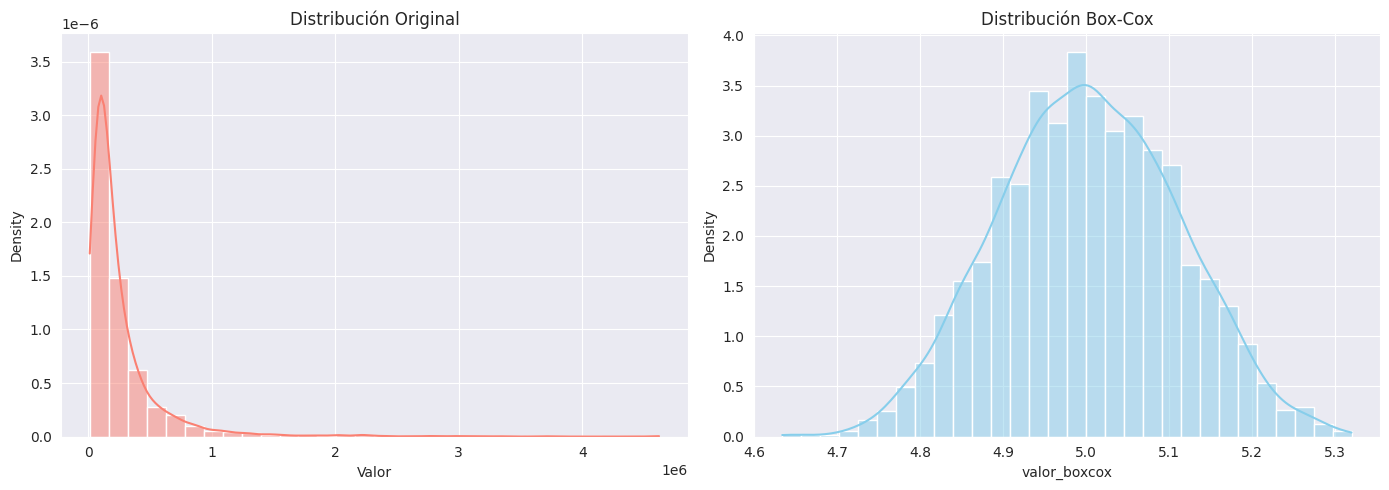

P-valor de normalidad (Box-Cox): 0.00001


In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox, normaltest, skew

# Asegúrate de que los datos están cargados
# datos = pd.read_csv('dataset.csv')  # si no lo has cargado aún

# ✔ Paso 1: verificar que la variable tiene solo valores positivos
if (datos['Valor'] <= 0).any():
    raise ValueError("Box-Cox requiere valores estrictamente positivos.")

# ✔ Paso 2: aplicar transformación Box-Cox
valor_boxcox, lambda_valor = boxcox(datos['Valor'])
datos['valor_boxcox'] = valor_boxcox  # nueva columna transformada

print(f"Lambda óptimo para Box-Cox: {lambda_valor:.4f}")

# ✔ Paso 3: analizar simetría
print("Asimetría antes:", skew(datos['Valor']))
print("Asimetría después:", skew(datos['valor_boxcox']))

# ✔ Paso 4: visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(datos['Valor'], bins=30, kde=True, stat='density', ax=axes[0], color='salmon')
axes[0].set_title('Distribución Original')

sns.histplot(datos['valor_boxcox'], bins=30, kde=True, stat='density', ax=axes[1], color='skyblue')
axes[1].set_title('Distribución Box-Cox')

plt.tight_layout()
plt.show()

# ✔ Paso 5 (opcional): test de normalidad
stat, p_value = normaltest(datos['valor_boxcox'])
print(f"P-valor de normalidad (Box-Cox): {p_value:.5f}")

Lambda óptimo para Box-Cox: -0.1752


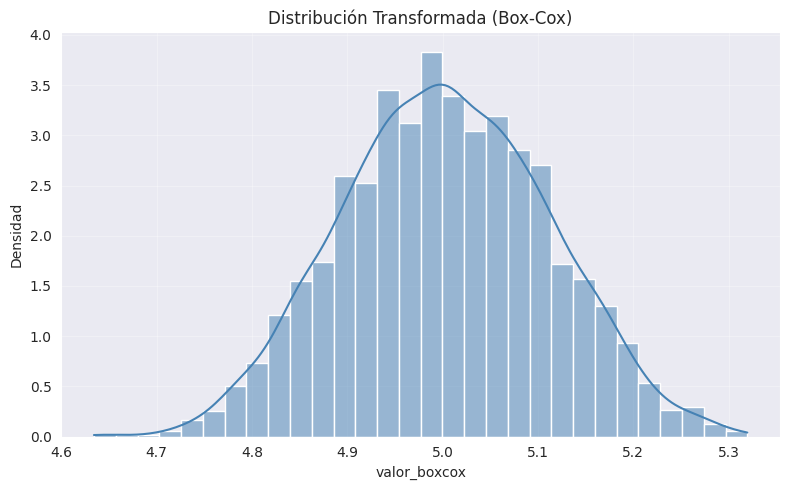

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Aplicar transformación Box-Cox
valor_boxcox, lambda_valor = boxcox(datos['Valor'])
datos['valor_boxcox'] = valor_boxcox

# Mostrar lambda óptimo
print(f"Lambda óptimo para Box-Cox: {lambda_valor:.4f}")

# Graficar solo la variable transformada
plt.figure(figsize=(8, 5))
sns.histplot(datos['valor_boxcox'], bins=30, kde=True, stat='density', color='steelblue')
plt.title('Distribución Transformada (Box-Cox)')
plt.xlabel('valor_boxcox')
plt.ylabel('Densidad')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# <font color='red' style='font-size: 30px;'>3.2 Comprobando relación lineal</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables transformadas del dataset

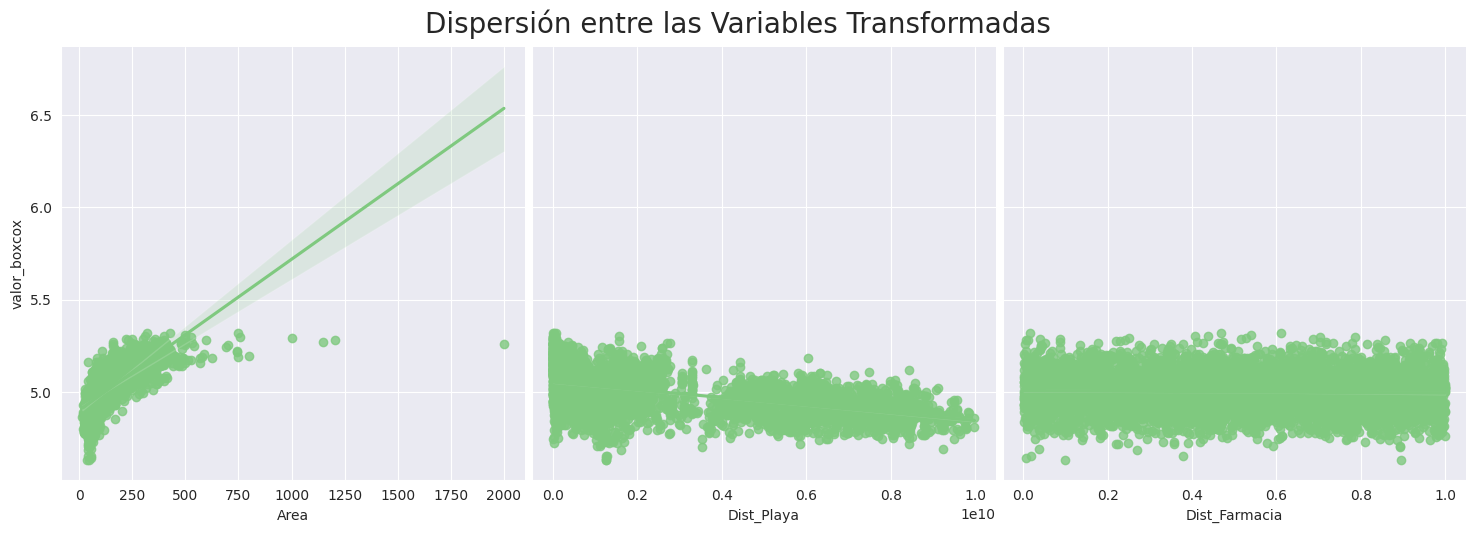

In [93]:
ax=sns.pairplot(datos, y_vars='valor_boxcox',x_vars=['Area',	'Dist_Playa',	'Dist_Farmacia'] , height=5.0, kind='reg')
ax.fig.suptitle('Dispersión entre las Variables Transformadas', fontsize=20, y=1.05)
ax

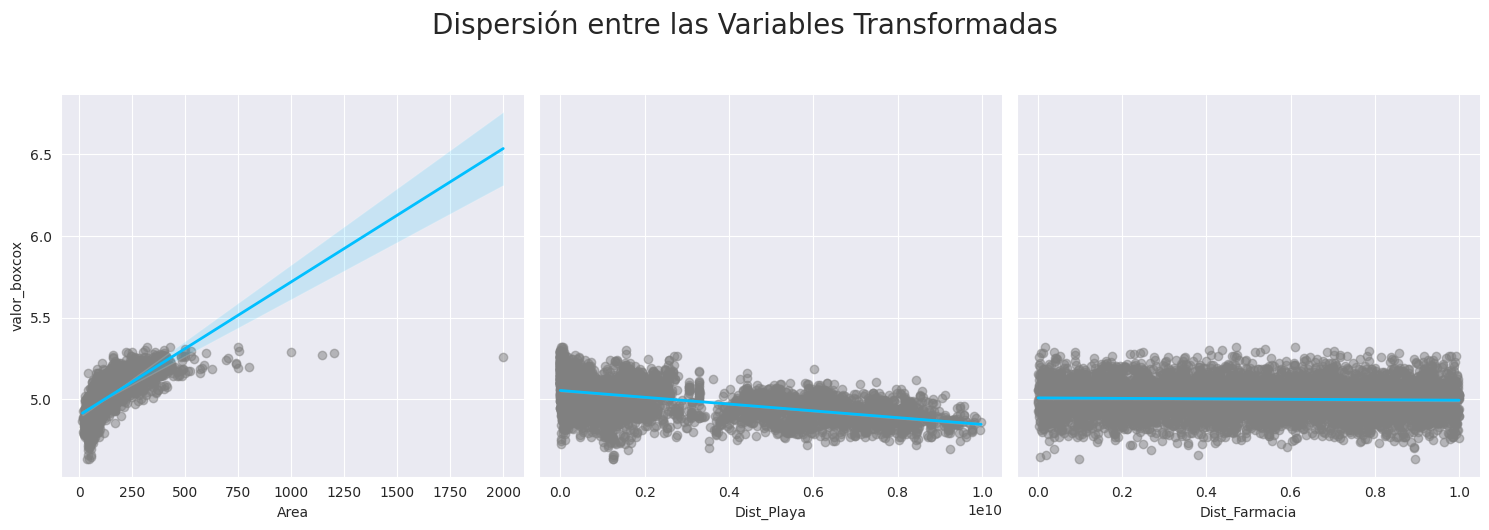

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Color azul luminoso personalizado (puedes cambiar el código hex si lo deseas)
azul_luminoso = '#00BFFF'  # Deep Sky Blue

# Pairplot con línea de regresión azul
ax = sns.pairplot(datos,
                  y_vars='valor_boxcox',
                  x_vars=['Area', 'Dist_Playa', 'Dist_Farmacia'],
                  kind='reg',
                  height=5.0,
                  plot_kws={'line_kws': {'color': azul_luminoso, 'linewidth': 2},
                            'scatter_kws': {'alpha': 0.5, 'color': 'gray'}})

# Título general del gráfico
ax.fig.suptitle('Dispersión entre las Variables Transformadas', fontsize=20, y=1.05)
plt.tight_layout()
plt.show()

Ahora que tenemos relaciones mas lineales, podemos estimar modelos de regresión.

# <font color='red' style='font-size: 30px;'>4.1 Creando los *Datasets* de Entrenamiento y Prueba</font>
<hr style='border: 2px solid red;'>

## Importando *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Creando una Series (pandas) para almacenar el Precio de los Inmubles (y)

## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

## Creando los datasets de entrenamiento y de prueba

# Regresión Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b> dependiente </b>) en relación con una o más variables (las variables <b> explicativas </b>) con el fin de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de estas últimas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El *scikit-learn* es un módulo de Python especializado en soluciones para *machine learning*.</p>



<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Log-lineal.png'>

## Importando la biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

## Estimando el modelo con statsmodels

# <font color='red' style='font-size: 30px;'>4.2 Evaluando el Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Evaluando las estadísticas de prueba del modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

# <font color='red' style='font-size: 30px;'>4.3 Modificando el modelo y reevaluando el ajuste</font>
<hr style='border: 2px solid red;'>

## Creando un nuevo conjunto de variables explicativas (X)

## Creando los datasets de entrenamiento y de prueba

## Estimando el modelo con el statsmodels

## Evaluando las estadísticas de prueba para el nuevo modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

# <font color='red' style='font-size: 30px;'>5.1 Estimando el Modelo con los Datos de Entrenamiento</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* y *metrics* da la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

## Instanciando la clase *LinearRegression()*

## Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y_train y X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinación - R²

El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.


$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Generando predicciones para los datos de PRUEBA (X_test) con el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

## Obteniendo el coeficiente de determinación (R²) para las predicciones del nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

# <font color='red' style='font-size: 30px;'>5.2 Obteniendo Predicciones Puntuales</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

## Generando predicción puntual

## Invirtiendo la transformación para obtener la estimación en US$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

## Creando un simulador simple

# <font color='red' style='font-size: 30px;'>5.3 Interpretación de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

### Obteniendo el intercepto del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> intercepto </b> representa el efecto medio en $ Y $ (Precio del Inmueble) con todas las variables explicativas excluidas del modelo. En el caso del modelo log-lineal, este coeficiente debe ser transformado utilizando la función exponencial para que sea presentado en US$.</p>

## Obteniendo los coeficientes de regresión

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b> coeficientes de regresión </b> $\beta_2$ y $\beta_3 $ son conocidos como <b> coeficientes de regresión parciales </b> o <b> coeficientes angulares parciales </b>  </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Un aspecto interesante del modelo log-lineal, que lo ha hecho ampliamente utilizado en estudios aplicados, es que los coeficientes angulares $\beta_2$ y $\beta_3$ miden las elasticidades de Y en relación a $X_2$ y $X_3$, es decir, la variación porcentual de Y correspondiente a una variación porcentual dada (pequeña ) en $X_2$ y $X_3$.</p>

## Confirmando el orden de las variables explicativas en el DataFrame

## Creando una lista de nombres de las variables del modelo

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

## Interpretación de los Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> →  Excluyendo el efecto de las variables explicativas ($X_2=X_3=0$), el efecto medio en el Precio de los Inmuebles seria <b>US$ 2.093,66</b> (exp[7.646667]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Manteniendo constante el valor de $X_3$ (Distancia a la Playa), la adición de 1% en el Área de un inmueble genera, en promedio, un aumento de <b>1.06%</b> en el Precio del Inmueble.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distancia a la playa (km)</b> → Manteniendo constante el valor de $X_2$ (Área), la adición de 1% en la Distancia de un inmueble a la playa genera, en promedio, una disminución de <b>0.49%</b> en el Precio del Inmueble.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análisis Gráfico de los Resultados del Modelo</font>
<hr style='border: 2px solid red;'>

## Generando predicciones del modelo para los datos de ENTRENAMIENTO

## Gráfico de dispersión entre valor estimado y valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

In [35]:

ax.figure.set_size_inches(12, 6)
ax.set_title('Predicción X Real', fontsize=18)
ax.set_xlabel('log del Precio - Predicción', fontsize=14)
ax.set_ylabel('log del Precio - Real', fontsize=14)
ax

NameError: name 'ax' is not defined

## Obteniendo los residuos

## Graficando la distribuición de frecuencias de los residuos

In [ ]:

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias de los Residuos', fontsize=18)
ax.set_xlabel('log del Precio', fontsize=14)
ax